# Market Basket Analysis on Online Retail Data

## Exploratory Data Analysis

### 1. Overview:
- Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items.
- It works by looking for combinations of items that occur together frequently in transactions.
- To put it another way, it allows retailers to identify relationships between the items that people buy.
- Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

# Runtime Configuration Parameters for Matplotlib
plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
retail = pd.read_csv('/kaggle/input/cleanretaildata/CleanRetailData.csv')
retail.head()

/tmp/ipykernel_33/1032407584.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  retail = pd.read_csv('/kaggle/input/cleanretaildata/CleanRetailData.csv')


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Time of Day,Month,Week of the Year,Day of Week,Sales Revenue
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,19.5
1,1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
2,2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
3,3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,10.5
4,4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011-01-04,10:00:00,10,Morning,January,1,Tuesday,12.5


### 2. Top 10 Countries and their total order counts

In [3]:
# Aggregating on Countries
country_data_w_uk = retail.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).reset_index()
country_data_w_uk_subset = country_data_w_uk.head(10)

In [4]:
country_data_w_uk_subset

,Country,InvoiceNo
0,United Kingdom,16473
1,Germany,414
2,France,362
3,EIRE,266
4,Belgium,93
5,Netherlands,90
6,Spain,84
7,Australia,53
8,Switzerland,48
9,Portugal,44


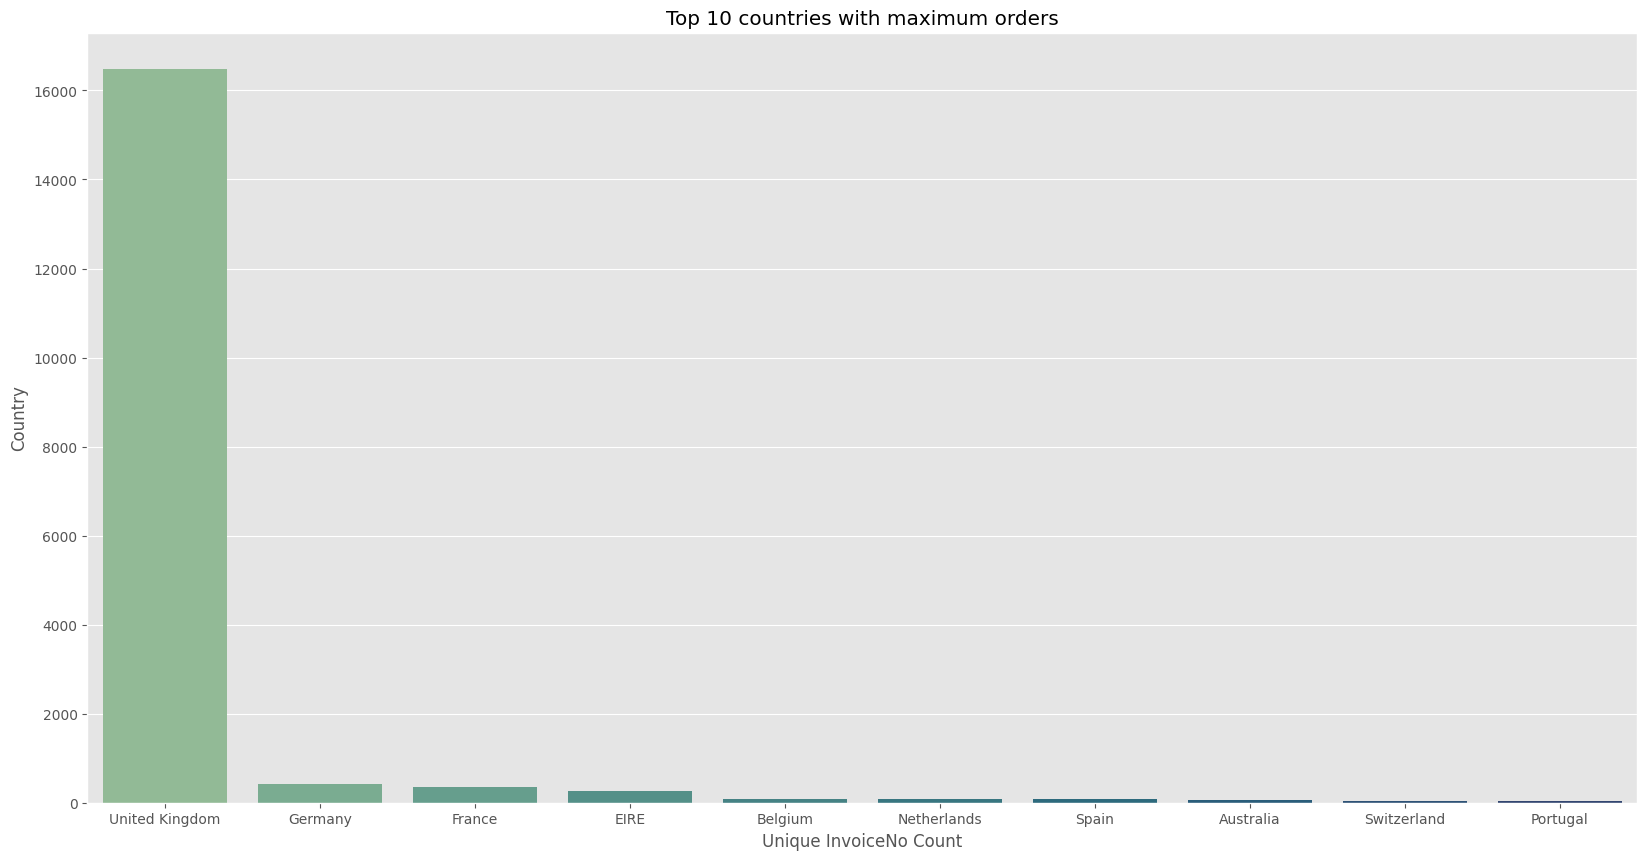

In [5]:
# Plotting
sns.barplot(data = country_data_w_uk_subset, x ="Country", y = "InvoiceNo", palette = 'crest')
# Labelling
plt.title('Top 10 countries with maximum orders')
plt.xlabel('Unique InvoiceNo Count')
plt.ylabel('Country')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(20,10)

**Observation:**
- United Kingdom has more than 16000 InvoiceNo count

In [7]:
# Aggregating on Countries without United Kingdom
country_data_wo_uk = retail[retail['Country']!='United Kingdom'].groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).reset_index()
country_data_wo_uk_subset = country_data_wo_uk.head(10)

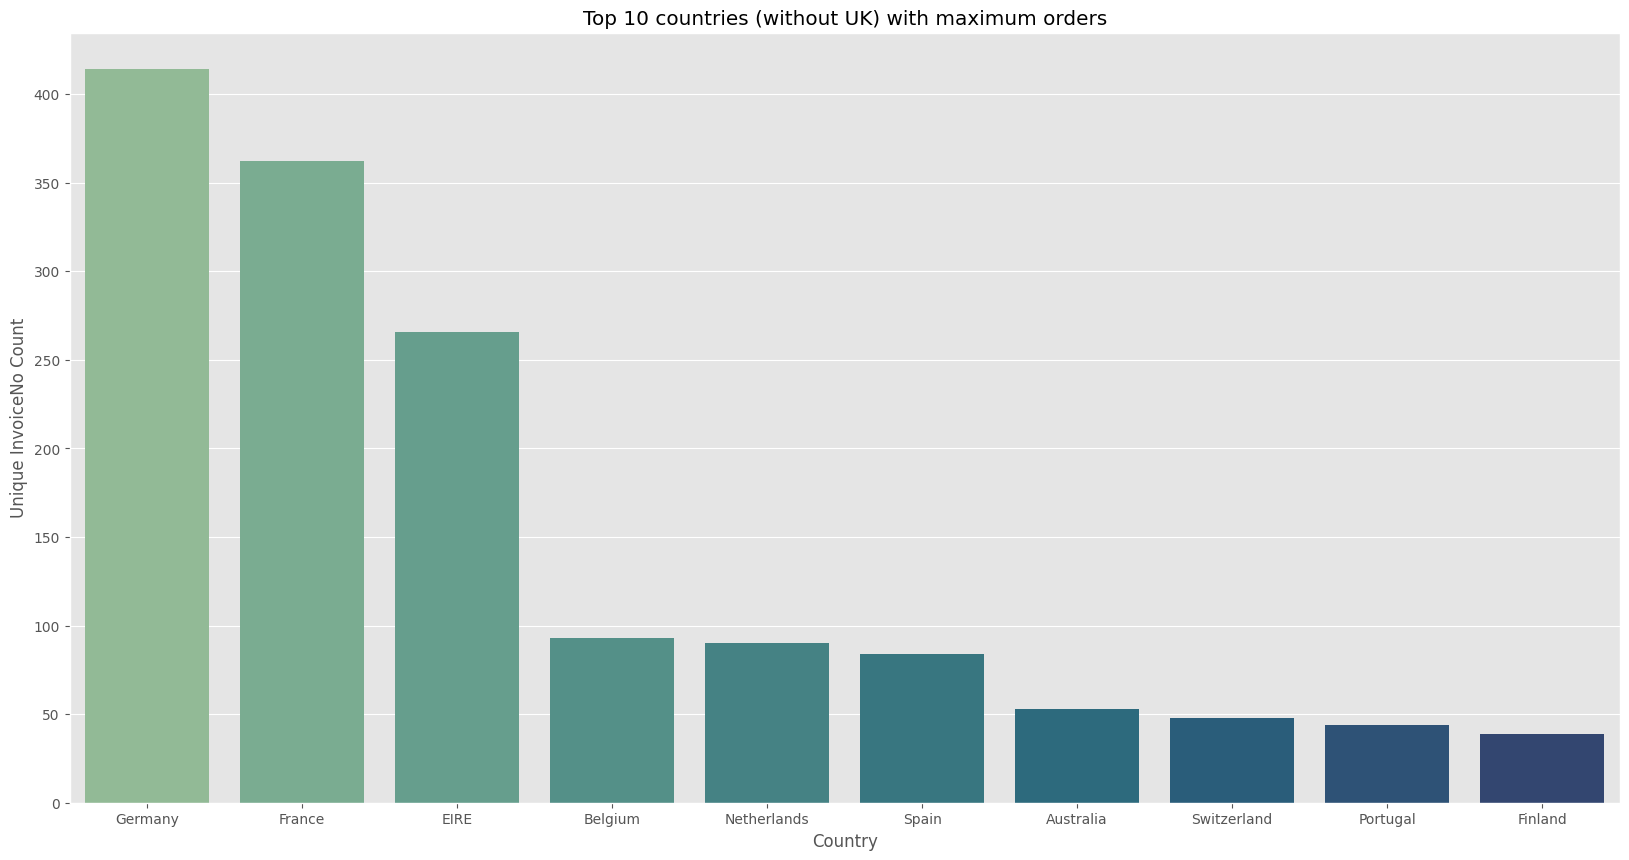

In [8]:
# Plotting
sns.barplot(data = country_data_wo_uk_subset, x ="Country", y = "InvoiceNo", palette = 'crest')
# Labelling
plt.title('Top 10 countries (without UK) with maximum orders')
plt.ylabel('Unique InvoiceNo Count')
plt.xlabel('Country')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(20,10)

**Observations:**
- The above charts show that the UK by far has more invoices with the count surpassing 16000
- Germany in in second place, with approximately 30 time less invoices (414 count)
- The retail store management can start posing question of why this is the case, especially when this is a Online retail store
- They need a process to improve the quality and quantity of website traffic to a website

### 3. Total Sales Revenue for Countries (except UK)

In [10]:
print(retail.columns)

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Date', 'Time',
       'Hour', 'Time of Day', 'Month', 'Week of the Year', 'Day of Week',
       'Sales Revenue'],
      dtype='object')


In [11]:
print(retail.head())  # Print the first few rows of the DataFrame

   Unnamed: 0 InvoiceNo StockCode                Description  Quantity  \
0           0    539993     22386    JUMBO BAG PINK POLKADOT        10   
1           1    539993     21499         BLUE POLKADOT WRAP        25   
2           2    539993     21498         RED RETROSPOT WRAP        25   
3           3    539993     22379    RECYCLING BAG RETROSPOT         5   
4           4    539993     20718  RED RETROSPOT SHOPPER BAG        10   

           InvoiceDate  UnitPrice CustomerID         Country        Date  \
0  2011-01-04 10:00:00       1.95      13313  United Kingdom  2011-01-04   
1  2011-01-04 10:00:00       0.42      13313  United Kingdom  2011-01-04   
2  2011-01-04 10:00:00       0.42      13313  United Kingdom  2011-01-04   
3  2011-01-04 10:00:00       2.10      13313  United Kingdom  2011-01-04   
4  2011-01-04 10:00:00       1.25      13313  United Kingdom  2011-01-04   

       Time  Hour Time of Day    Month  Week of the Year Day of Week  \
0  10:00:00    10     Morn

In [14]:
# Convert 'Sales Revenue' column to numeric
retail['Sales Revenue'] = pd.to_numeric(retail['Sales Revenue'], errors='coerce')

# Filter out rows where 'Country' is not 'United Kingdom'
filtered_data = retail[retail['Country'] != 'United Kingdom']

# Group by 'Country', sum the numeric values in 'Sales Revenue' column, and sort
sales_wo_uk = filtered_data.groupby('Country')['Sales Revenue'].sum().reset_index().sort_values(by='Sales Revenue', ascending=False)

# Reset index if needed
# sales_wo_uk = sales_wo_uk.reset_index(drop=True)

# Print the resulting DataFrame
print(sales_wo_uk)

                 Country  Sales Revenue
23           Netherlands      275134.86
10                  EIRE      261167.60
14               Germany      192137.41
13                France      175962.69
0              Australia      137138.46
30                 Spain       54002.83
32           Switzerland       51840.68
3                Belgium       35327.43
31                Sweden       32994.53
20                 Japan       29711.30
24                Norway       28667.52
26              Portugal       24903.14
6        Channel Islands       19684.01
12               Finland       17692.08
9                Denmark       17073.84
19                 Italy       15169.74
7                 Cyprus       11580.09
16             Hong Kong        9744.19
29             Singapore        9120.39
1                Austria        8585.48
18                Israel        8129.41
25                Poland        6726.49
15                Greece        4425.52
17               Iceland        3598.21


In [ ]:
# sales_wo_uk = retail[retail['Country'] != 'United Kingdom'].groupby('Country').sum().sort_values(by = 'Sales Revenue', ascending = False).reset_index()
# sales_wo_uk

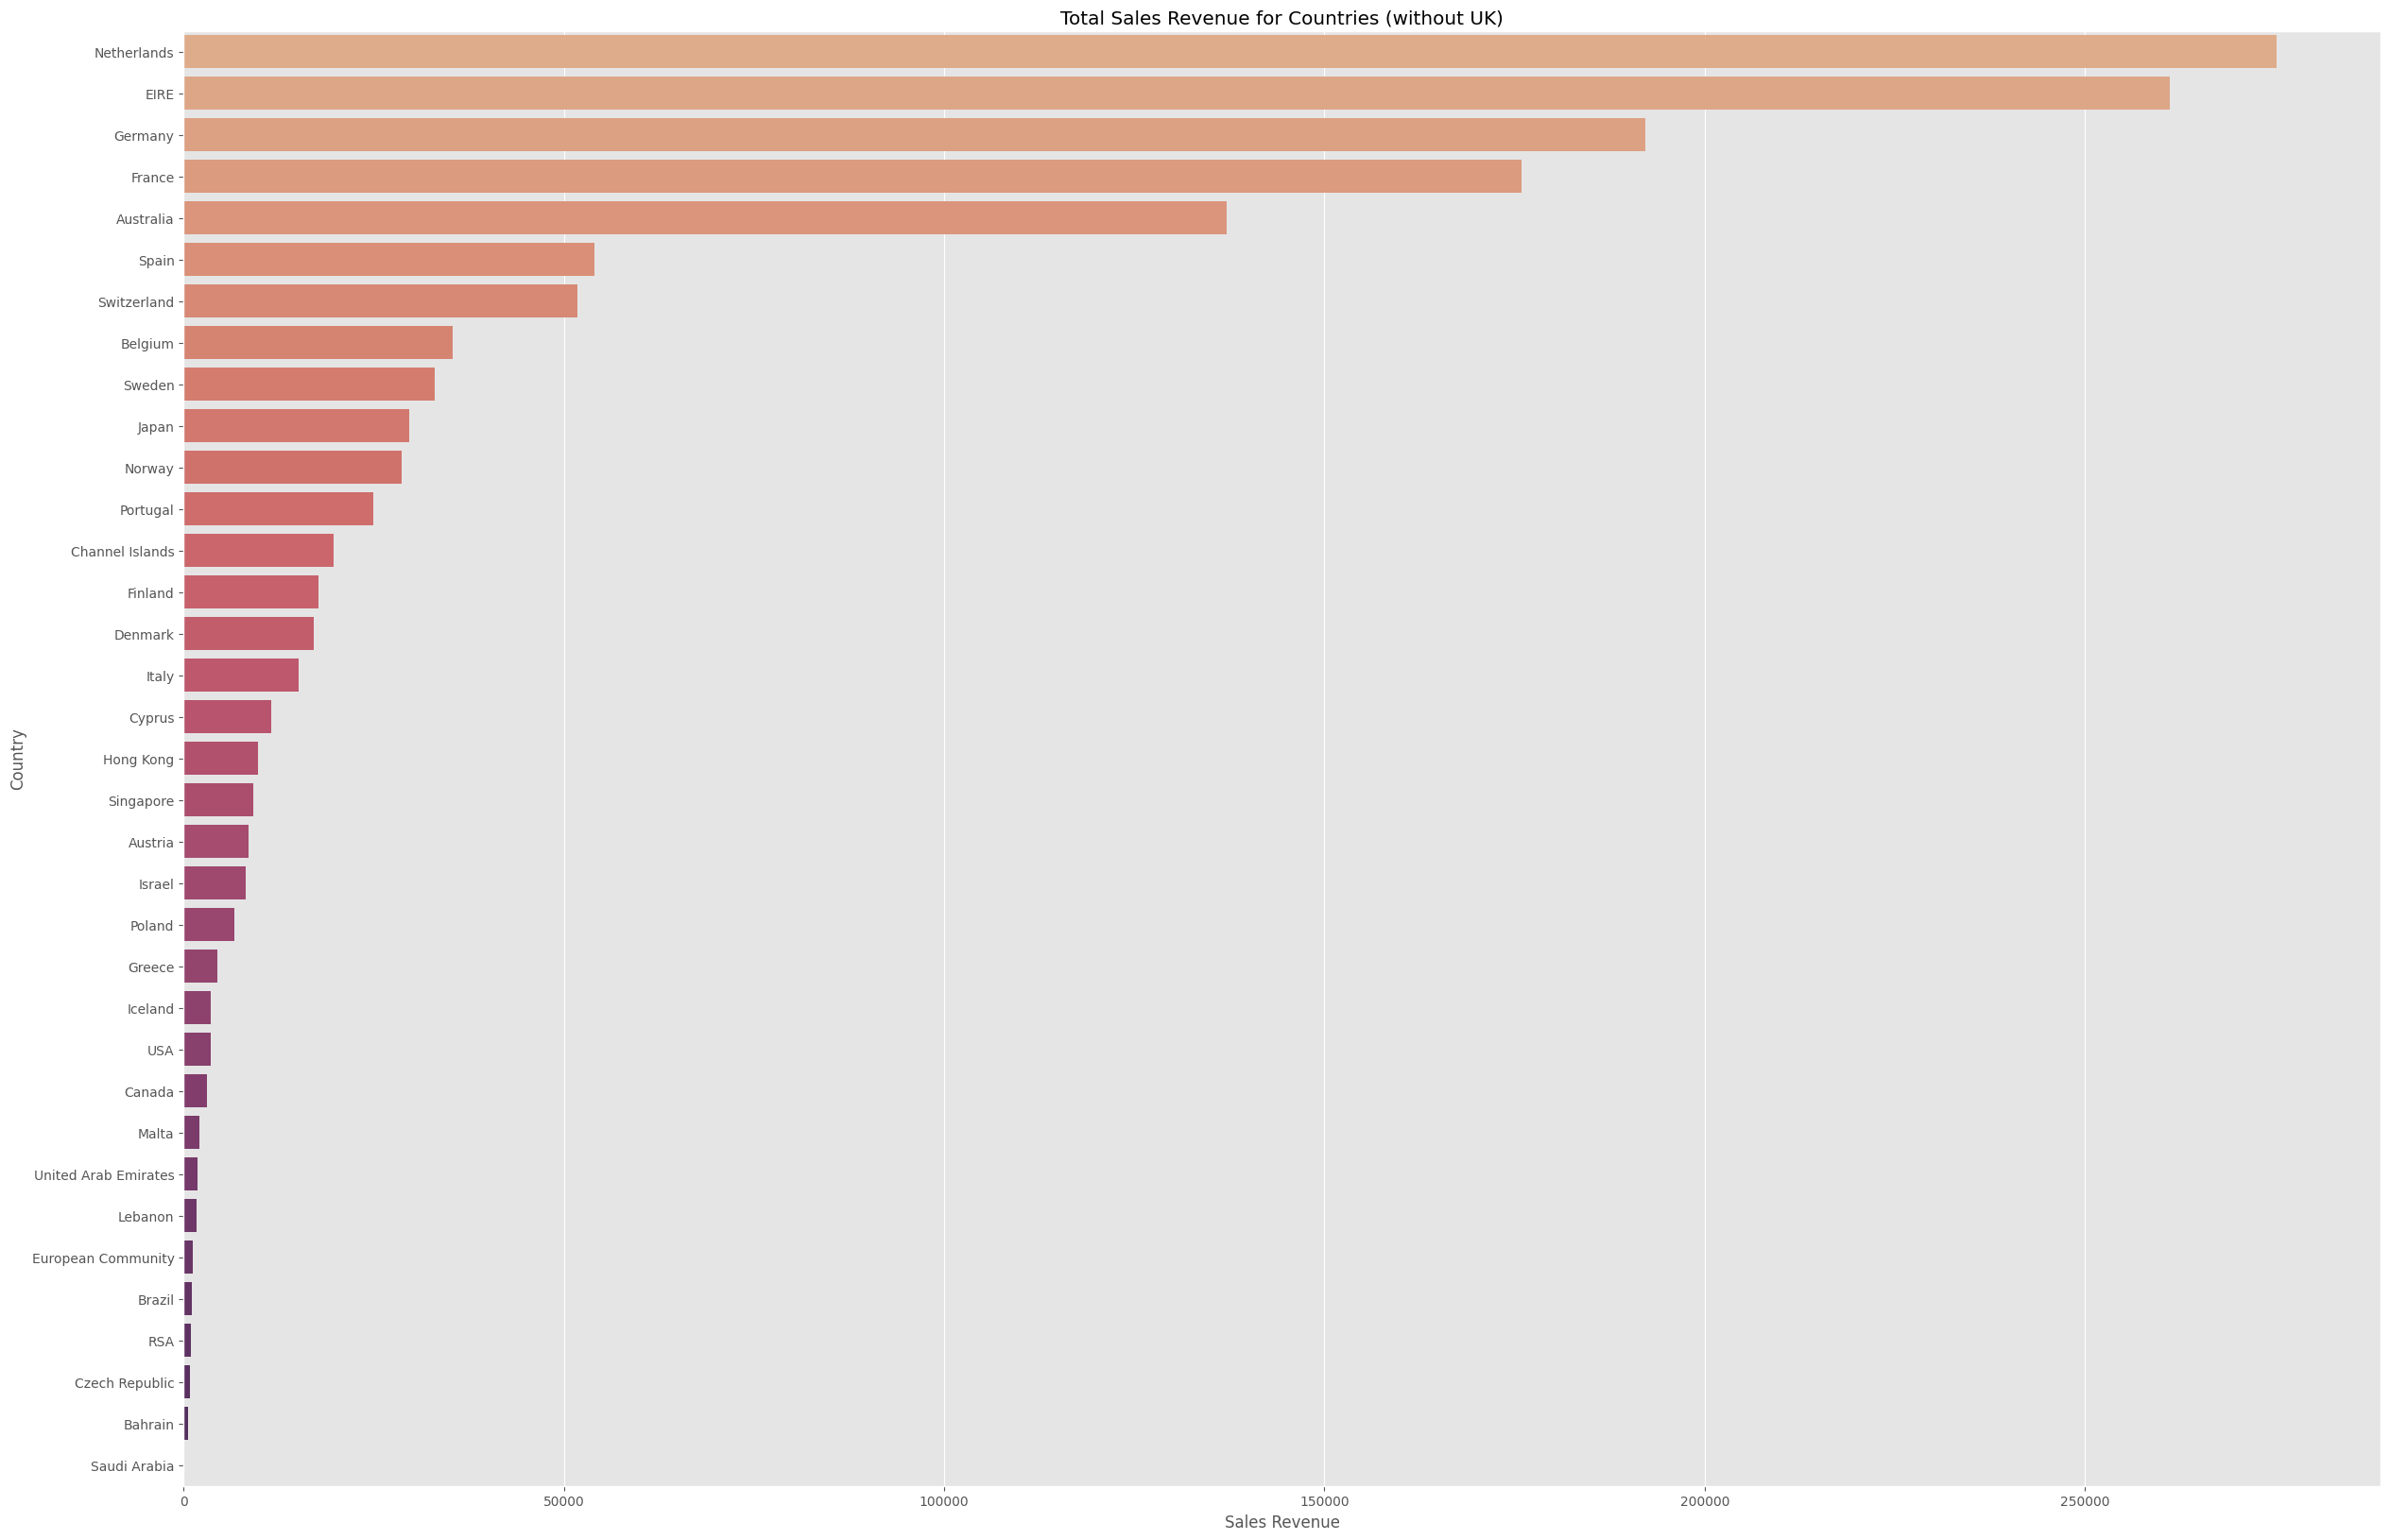

In [15]:
# Plotting
sns.barplot(data = sales_wo_uk, x ="Sales Revenue", y = "Country", palette = 'flare')
# Labelling
plt.title('Total Sales Revenue for Countries (without UK)')
plt.ylabel('Country')
plt.xlabel('Sales Revenue')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(30,20)

**Observations:**
- Sales Revenue for Netherlands and Ireland(EIRE) are quite close ($270K)

### 4. Total Quantity of Items Sold for Countries (except UK)

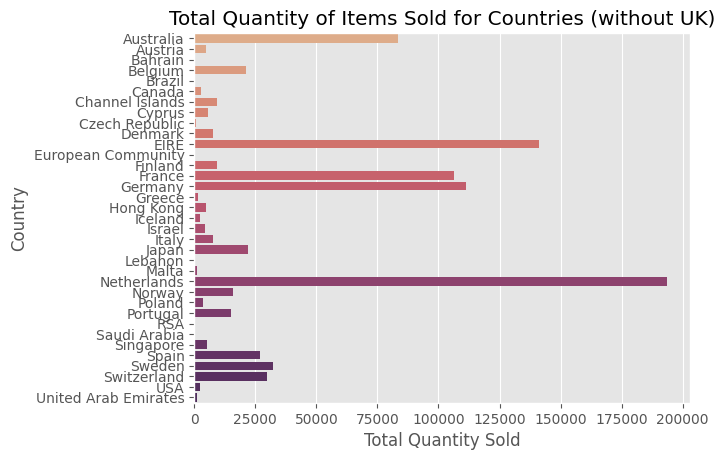

In [17]:
# Calculate total quantity of items sold for each country
total_quantity_sold = retail[retail['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().reset_index()

# Plotting
sns.barplot(data=total_quantity_sold, x="Quantity", y="Country", palette='flare')

# Labelling
plt.title('Total Quantity of Items Sold for Countries (without UK)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')

# Show the plot
plt.show()

In [ ]:
# # Plotting
# sns.barplot(data = sales_wo_uk, x ="Quantity", y = "Country", palette = 'flare')
# # Labelling
# plt.title('Total Quantity of Items Sold for Countries (without UK)')
# plt.ylabel('Country')
# plt.xlabel('Total Quantity')
# # Set size for plot
# fig = plt.gcf()
# fig.set_size_inches(30,20)

**Observations:**
- Total Quantity of items sold for Netherlands and Ireland(EIRE) are at the top with values 190K and 140K 

### 4. Monthly Statistics

In [18]:
# Function to group on Month/Date/Day of the Week/Week of the Year/Time of the Day
def group_sales_quantity(df, feature):
    df = df[[f'{feature}','Quantity','Sales Revenue']].groupby([f'{feature}']).sum().sort_values(by= 'Sales Revenue', ascending = False).reset_index()
    return df

Text(0.5, 0, 'Total Sales Revenue')

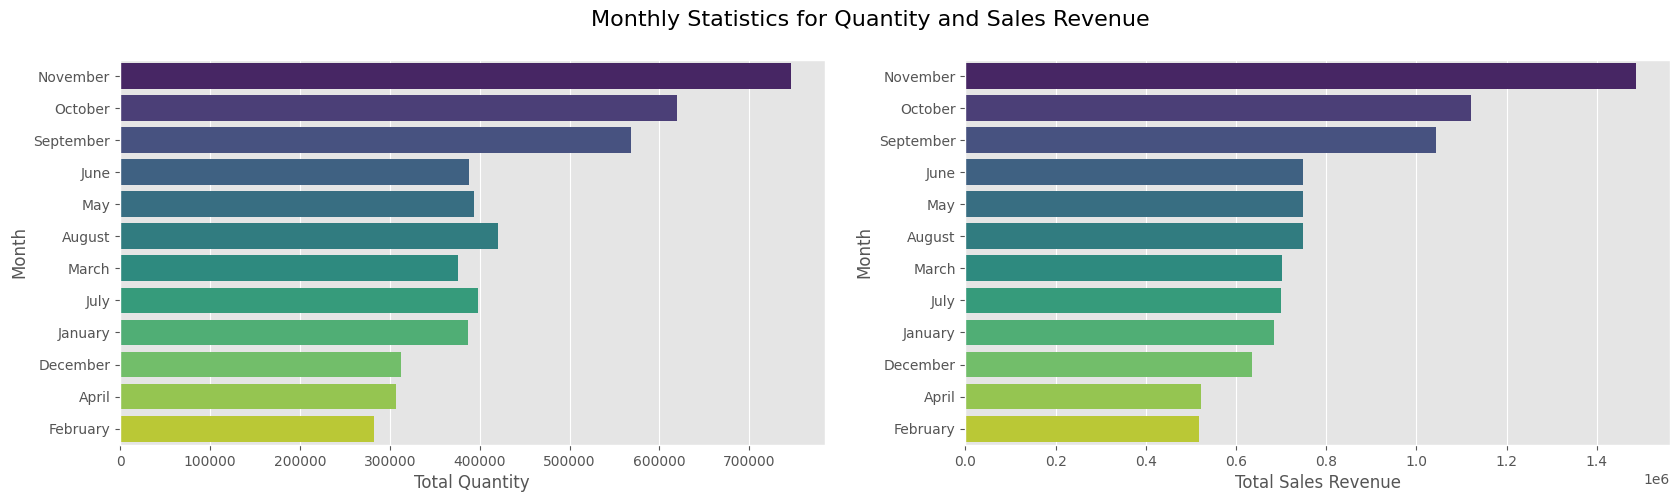

In [19]:
# Get monthly stats dataframe
monthly_stats = group_sales_quantity(retail, 'Month')
# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Monthly Statistics for Quantity and Sales Revenue', fontsize=16)

# Distribution of price, after outlier handling
sns.barplot(data = monthly_stats, x = "Quantity", y = "Month" , palette = 'viridis', ax = ax[0])
ax[0].set_xlabel('Total Quantity')

# Log transformation and handling neg values with log(1+x)
sns.barplot(data = monthly_stats, x = "Sales Revenue", y = "Month", palette = 'viridis', ax = ax[1])
ax[1].set_xlabel('Total Sales Revenue')

**Observations:**
- As expected, the Monthly statistics for November is the highest due to **Thanksgiving Holiday/Black Friday/Cyber Monday sale**

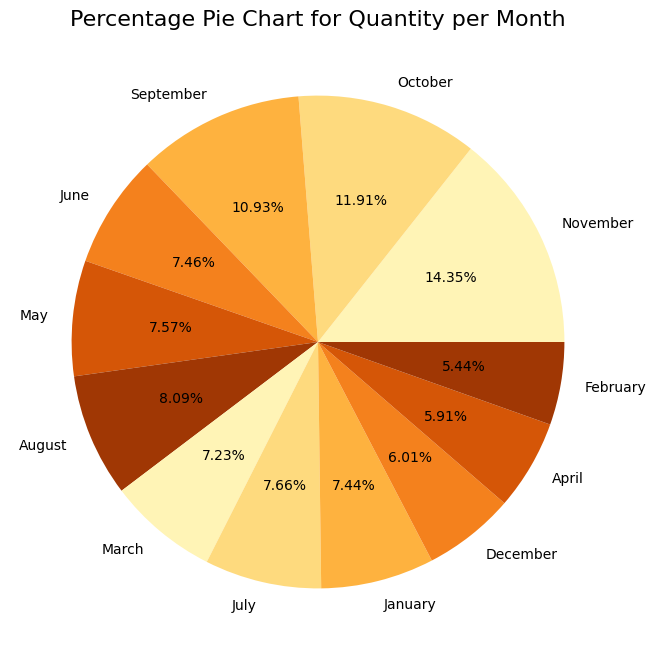

In [20]:
# Colour palette
palette_color = sns.color_palette('YlOrBr')

# Quantity per month
plt.pie(monthly_stats['Quantity'], labels = monthly_stats['Month'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Quantity per Month', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

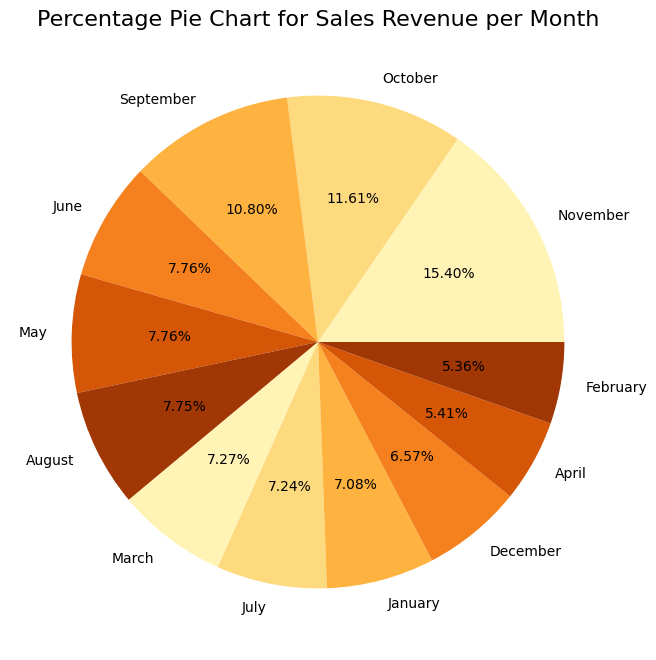

In [21]:
# Sales Revenue per month
plt.pie(monthly_stats['Sales Revenue'], labels = monthly_stats['Month'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Month', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Observation:**
- Highest sales (by revenue and quantity) has been noted during the Fall season, which are the month of September, October, November
- Lowest percentage of sales (by revenue and quantity) has been noted during the Winter season (January, February, March, April) where people are unable to leave the house due to harsh weather

### 5. Daily Statistics

#### 5.1 Day of Week

Text(0, 0.5, 'Day of Week')

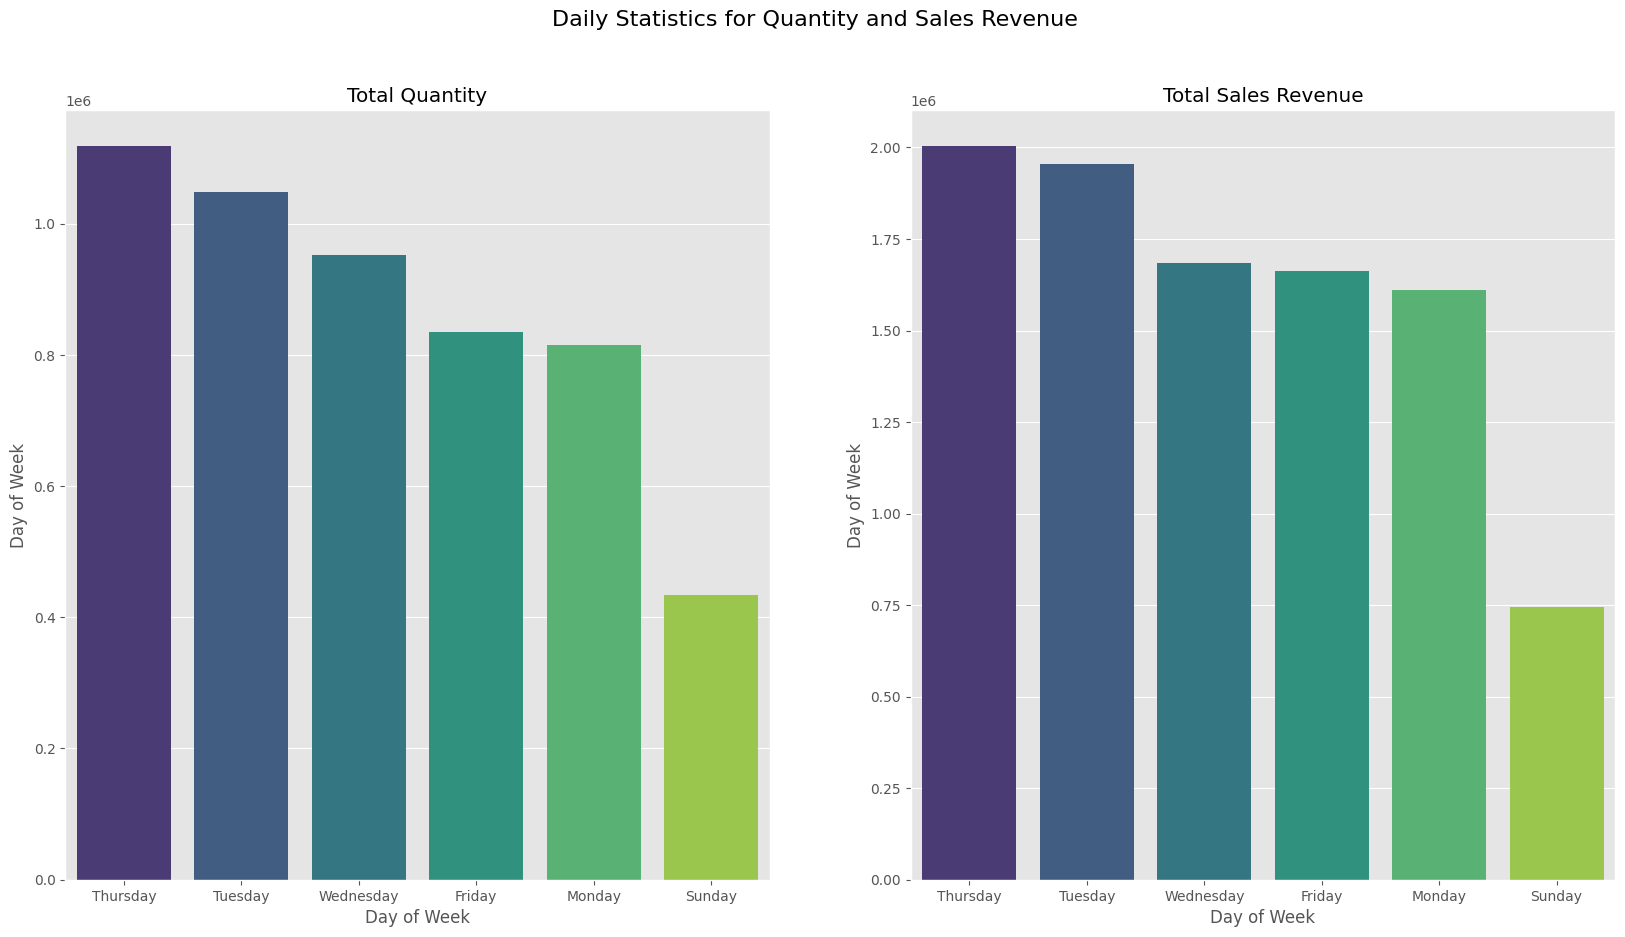

In [22]:
# Get daily stats dataframe
daily_stats = group_sales_quantity(retail, 'Day of Week')
# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Daily Statistics for Quantity and Sales Revenue', fontsize=16)

sns.barplot(data = daily_stats, x = "Day of Week", y = "Quantity" , palette = 'viridis', ax = ax[0])
ax[0].set_title('Total Quantity')
ax[0].set_ylabel('Day of Week')

sns.barplot(data = daily_stats, x = "Day of Week", y = "Sales Revenue", palette = 'viridis', ax = ax[1])
ax[1].set_title('Total Sales Revenue')
ax[1].set_ylabel('Day of Week')

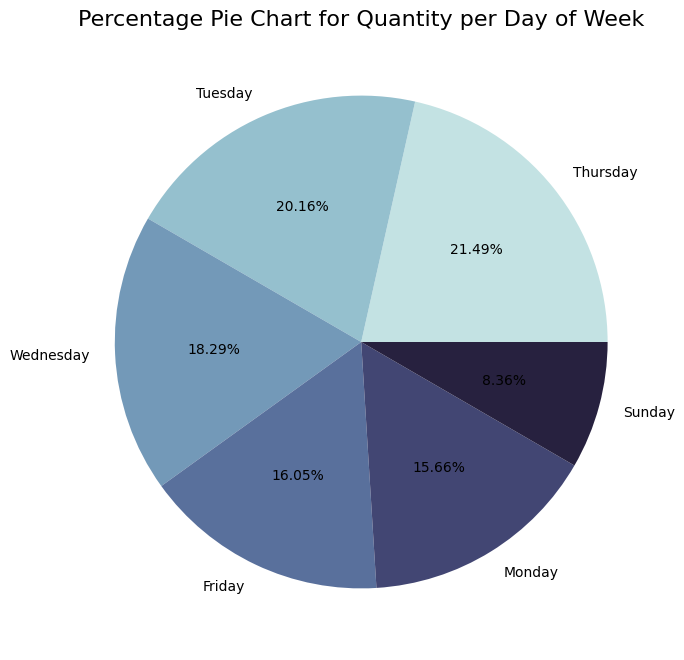

In [23]:
# Colour palette
palette_color = sns.color_palette('ch:start=.2,rot=-.3')

# Quantity per day of week
plt.pie(daily_stats['Quantity'], labels = daily_stats['Day of Week'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Quantity per Day of Week', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

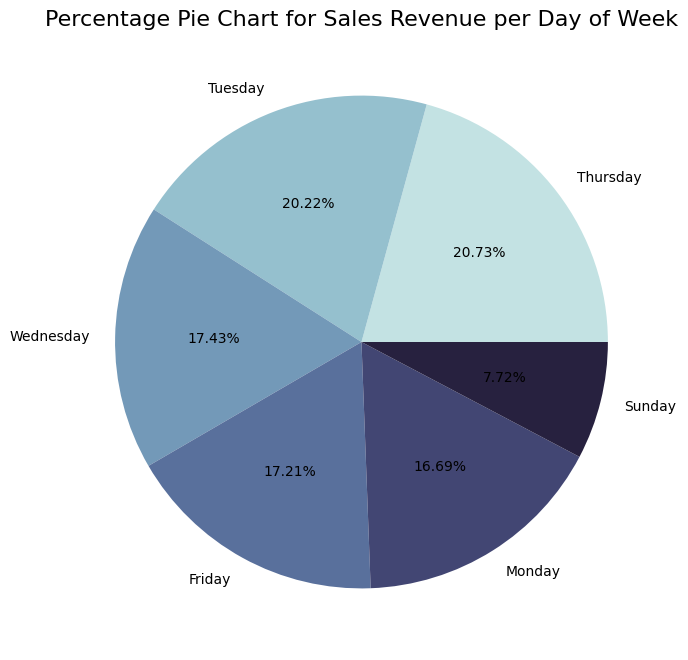

In [24]:
# Sales Revenue per Day of Week
plt.pie(daily_stats['Sales Revenue'], labels = daily_stats['Day of Week'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Day of Week', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Observation:**
- People buy more on Thursdays to prepare for the weekend, followed by Tuesday to prepare for the week ahead
- Least sale is noted for Sunday

#### 5.2 Time of Day

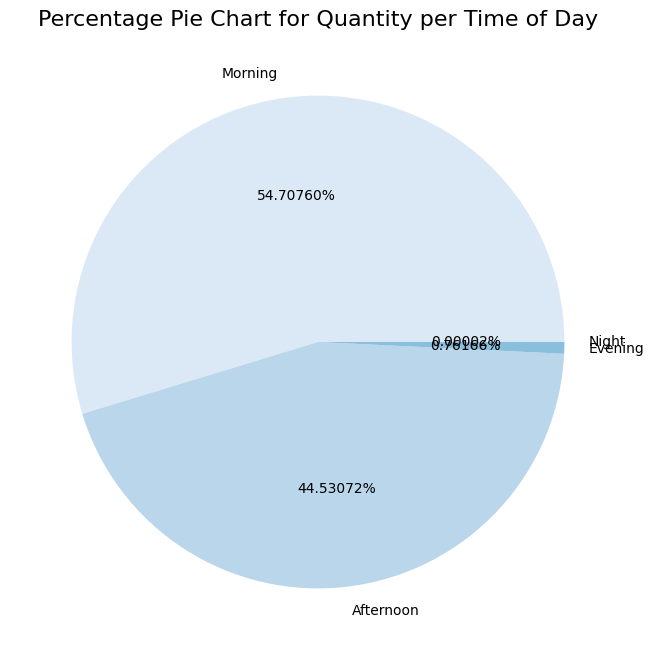

In [25]:
# Get time of day stats dataframe
timeofday_stats = group_sales_quantity(retail, 'Time of Day')

# Colour palette
palette_color = sns.color_palette('Blues')

# Quantity per day of week
plt.pie(timeofday_stats['Quantity'], labels = timeofday_stats['Time of Day'], colors=palette_color, autopct='%.05f%%')
plt.title('Percentage Pie Chart for Quantity per Time of Day', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

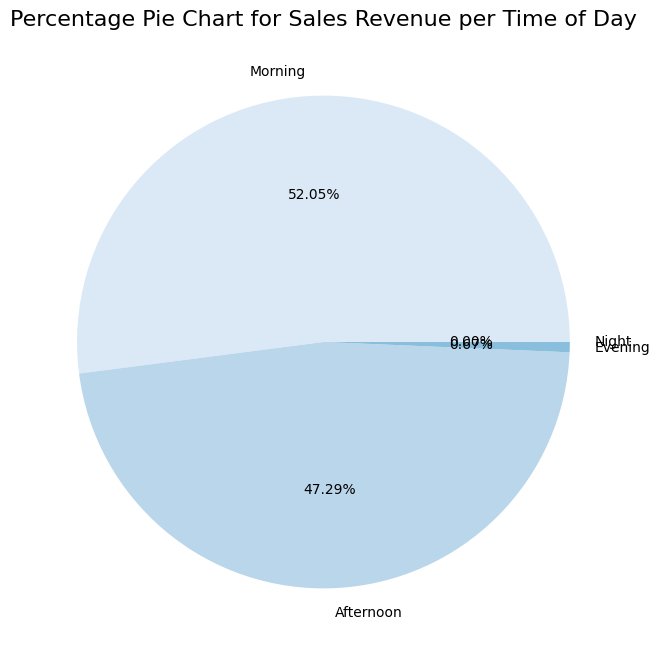

In [26]:
# Get time of day stats dataframe
timeofday_stats = group_sales_quantity(retail, 'Time of Day')

# Colour palette
palette_color = sns.color_palette('Blues')

# Quantity per day of week
plt.pie(timeofday_stats['Sales Revenue'], labels = timeofday_stats['Time of Day'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Time of Day', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Observation:**
- People tend to buy more during the morning period than at night

### 6. Hourly sale

#### 6.1 Hourly volume of quantity of items sold

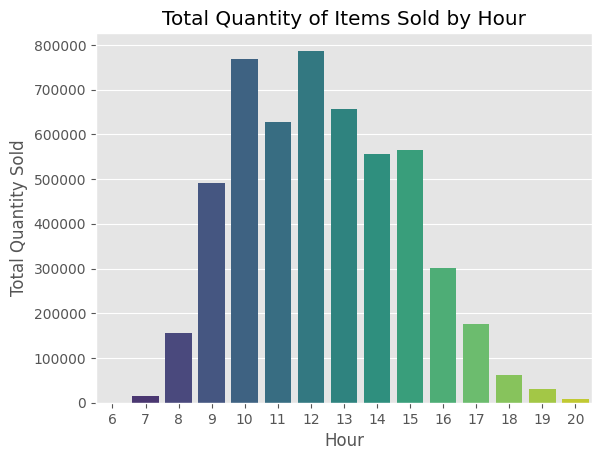

In [29]:
# Convert 'Quantity' column to numeric, coerce errors to NaN
retail['Quantity'] = pd.to_numeric(retail['Quantity'], errors='coerce')

# Drop rows with NaN values in 'Quantity' column
retail.dropna(subset=['Quantity'], inplace=True)

# Aggregate on Hour
hourly_quantity = retail.groupby('Hour')['Quantity'].sum().reset_index()

# Plot
sns.barplot(data=hourly_quantity, x="Hour", y="Quantity", palette='viridis')

# Labelling
plt.title('Total Quantity of Items Sold by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Quantity Sold')

# Show the plot
plt.show()

In [ ]:
# # Aggregate on Hour 
# hourly_quantity = retail.groupby('Hour').sum()['Quantity'].reset_index()
# # Plot
# sns.barplot(data = hourly_quantity, x = "Hour", y = "Quantity" , palette = 'viridis')
# plt.title('Hourly Volume of Quantity Sold')
# plt.ylabel('Total Quantity')
# plt.xlabel('Hour of Day')

# # Displaying chart
# fig = plt.gcf()
# fig.set_size_inches(8,8)
# plt.show()

**Observation:**
- Highest volume of items are sold during 10-12am window in the morning

#### 6.2 Hourly sale using total order count of unique InvoiceNos

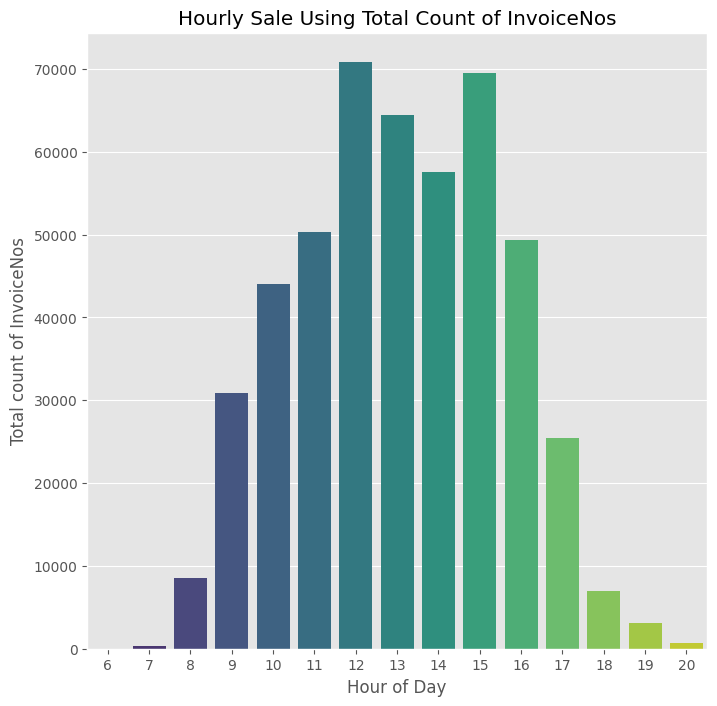

In [30]:
# Aggregate on Hour 
hourly_orders = retail.groupby('Hour').count()['InvoiceNo'].reset_index()
# Plot
sns.barplot(data = hourly_orders, x = "Hour", y = "InvoiceNo" , palette = 'viridis')
plt.title('Hourly Sale Using Total Count of InvoiceNos')
plt.ylabel('Total count of InvoiceNos')
plt.xlabel('Hour of Day')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

**Observation:**
- Highest number of orders are placed around noon (12pm), followed by 3pm in the afternoon

### 7. CustomerID

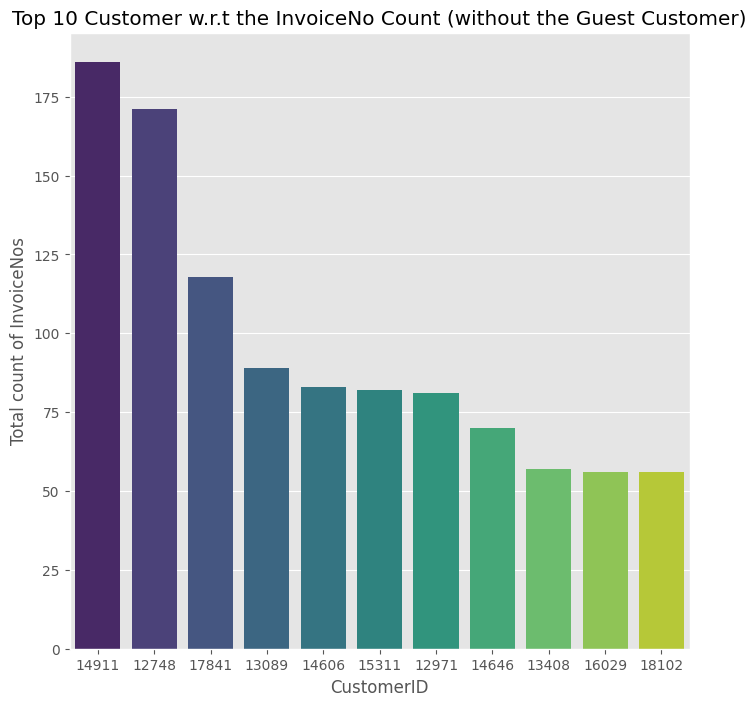

In [31]:
# Top 10 customers without 'Guest Customer'
top_customers = retail[retail["CustomerID"] != "Guest Customer"].groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(11)
# Plot
sns.barplot(data = top_customers, x = "CustomerID", y = "InvoiceNo" , palette = 'viridis')
plt.title('Top 10 Customer w.r.t the InvoiceNo Count (without the Guest Customer)')
plt.ylabel('Total count of InvoiceNos')
plt.xlabel('CustomerID')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

### 8. Top Products

#### 8.1 Top products by sold Quantity

In [32]:
# Top 10 Product Description by Quantity
top_products_qty = group_sales_quantity(retail, 'Description').sort_values(ascending=False, by = "Quantity").reset_index(drop=True)
top_products_qty.drop('Sales Revenue', axis=1, inplace=True)
top_products_qty.head()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49660
3,JUMBO BAG RED RETROSPOT,46220
4,POPCORN HOLDER,36746


#### 8.2 Top products by Sales Revenue

In [33]:
# Top 10 Product Description by Sales Revenue
top_products_revenue = group_sales_quantity(retail, 'Description').sort_values(ascending=False, by = "Sales Revenue").reset_index(drop=True)
top_products_revenue.drop('Quantity', axis=1, inplace=True)
top_products_revenue.head()

,Description,Sales Revenue
0,DOTCOM POSTAGE,181577.58
1,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2,REGENCY CAKESTAND 3 TIER,146436.28
3,PARTY BUNTING,98237.49
4,WHITE HANGING HEART T-LIGHT HOLDER,95002.50


The above dataframe will be used to for the Streamlit UI.